In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [2]:
filename = "/kaggle/input/noshowappointments/KaggleV2-May-2016.csv"
df = pd.read_csv(filename)

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


After reviewing the data, for easier analysis, I'll add rows to distinct the different days, hours, and the time that passed between the registration to the appointment.

In [4]:
import calendar

#add more columns for the analysis     
df["ScheduledDay"] =pd.to_datetime(df["ScheduledDay"])
df["AppointmentDay"] =pd.to_datetime(df["AppointmentDay"])
df["ScheduledHour"] = pd.to_datetime(df["ScheduledDay"]).apply(lambda p:p.hour)
df["ScheduledDay_word"] = pd.to_datetime(df["ScheduledDay"]).apply(lambda p:calendar.day_name[p.weekday()])
df["ScheduledDay_num"] = pd.to_datetime(df["ScheduledDay"]).apply(lambda p:p.weekday)
df["between_reg2app"] = df.AppointmentDay.dt.date - df.ScheduledDay.dt.date

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledHour,ScheduledDay_word,ScheduledDay_num,between_reg2app
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18,Friday,4,0 days
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16,Friday,4,0 days
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,16,Friday,4,0 days
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17,Friday,4,0 days
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16,Friday,4,0 days


In [5]:
df.describe() # looking if there are problems with the data

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledHour,ScheduledDay_num,between_reg2app
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,10.774517,1.851955,10 days 04:24:31.828602965
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,3.216189,1.378520,15 days 06:07:11.673762786
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,-6 days +00:00:00
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0 days 00:00:00
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,4 days 00:00:00
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,3.000000,15 days 00:00:00
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,21.000000,5.000000,179 days 00:00:00


We can notice there is a problem with the data, there is at least one row with age < 0.

Another problem is that there's a between_reg2app<0, I will address the second problem later. 


In [6]:
#find the errors and remove them 
defect_rows_age =df[df["Age"]<0].index
df.drop(defect_rows_age,inplace=True)

#check if the age problem is solved
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,ScheduledHour,ScheduledDay_num,between_reg2app
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,10.774542,1.851971,10 days 04:24:39.789370826
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,3.216192,1.378515,15 days 06:07:14.979140739
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,-6 days +00:00:00
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,0 days 00:00:00
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,4 days 00:00:00
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,3.000000,15 days 00:00:00
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,21.000000,5.000000,179 days 00:00:00


**Work Plan**

We will try to characterize those who do not come to the appointments and then suggest ways to improve the percentage of arrival to the appointments.

The characteristics we will investigate will be -
* gender
* day during the week
* hour during the day
* people with disabilities
* age
* the effect of a reminder message
* duration between the registration to the actual appointment

**Show VS. No-show and Men VS. Women**

Our first question for the data is about the distribution between those who show to their appointments and those who are a "no-show". We will check if there is a diffrence between men and women concerning this issue. 

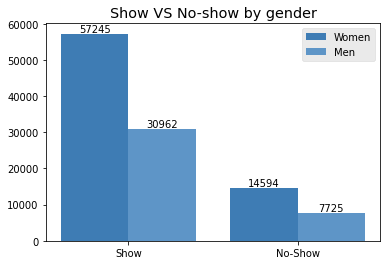

In [7]:
from matplotlib import pyplot as plt

#arange the data for the plot
M_num_show = len(df[(df["No-show"]=="No")&(df["Gender"]=="M")])
F_num_show = len(df[(df["No-show"]=="No")&(df["Gender"]=="F")])
F_num_nshow = len(df[(df["No-show"]=="Yes")&(df["Gender"]=="F")])
M_num_nshow = len(df[(df["No-show"]=="Yes")&(df["Gender"]=="M")])

y_men = [M_num_show,M_num_nshow,]
y_women= [F_num_show,F_num_nshow]

#arange general settings for the plot
x = np.arange(len(y_men))
width = 0.4

labels = ["Show","No-Show"]

#setting of the plot
fig, ax = plt.subplots()
plt.style.use("ggplot") 
W_no=ax.bar(x-0.2,  y_women,width= 0.4,color="#3E7CB4",label='Women')
M_no=ax.bar(x+0.2, y_men,width=0.4,color = "#5E95C7",label='Men')
ax.set_xticks(x, labels)
ax.set_title('Show VS No-show by gender')
ax.bar_label(W_no,padding=0)
ax.bar_label(M_no, padding=0)
ax.legend()
plt.show()

In [8]:
#for the written report
numb_noshow = df[(df["No-show"]=="Yes")]["PatientId"].count()
total_women = df[df["Gender"]=="F"]["PatientId"].count()
total_paintes = df["PatientId"].count()

print("% of Women in all the appointments: " ,str(round(total_women/total_paintes,2)))
print("% of No-show painets: ", str(round(numb_noshow/total_paintes,3)))
print("% of Men No-show painets : " , str(round(M_num_nshow/(M_num_nshow+M_num_show),3)))
print("% of Women No-show painets : " , str(round(F_num_nshow/(F_num_nshow+F_num_show),3)))


% of Women in all the appointments:  0.65
% of No-show painets:  0.202
% of Men No-show painets :  0.2
% of Women No-show painets :  0.203


From this examination, we can see two interesting insights
* Women make far more appointments than men (0.65)
* The difference in the "no-show" category between men and women is negligible (0.02)

**Day During the Week**

Our second question will check if there is a certain day that more people do not show up on. If we will find out there is one, we can organize the shifts  of the medical staff accordingly to minimize the no-shows.

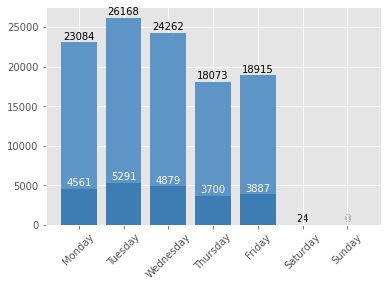

In [9]:
#create 2 series, one with a total of each day and the other with no-show of each day
y = df.groupby("ScheduledDay_num").count()["PatientId"]
y1 = df[df["No-show"]=="Yes"].groupby("ScheduledDay_num").count()["PatientId"]

#add to the series Sunday and arange general settings for the chart
y[6]=0
y1[6]=0
x = np.arange(7)
week_day =  ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

#setting of the chart
fig, ax = plt.subplots()
plt.style.use("ggplot") 
tot =  ax.bar(x, y,color = "#5E95C7")
no = ax.bar(x, y1,color = "#3E7CB4")
plt.xticks(np.arange(len(week_day )),week_day ,rotation= 45)
ax.bar_label(tot,padding=1)
ax.bar_label(no,padding=1,color="w")
plt.show()

We will also check the percentage of the distribution of "no-shows" during the weekdays.

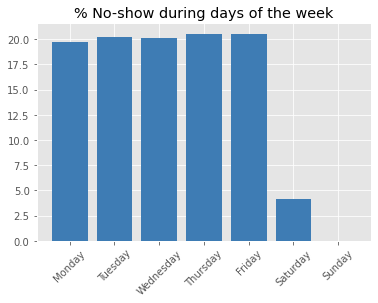

In [10]:
#copy the df and create a series with the percentage of each day 
y = df.copy()
y= y.groupby(["ScheduledDay_num",'No-show']).count().sort_index()
y= y["PatientId"].unstack()
y= y["Yes"]/(y["No"]+y["Yes"])*100

#add to the series Sunday and arange general settings for the chart
y[6]=0 
x=np.arange(7)
week_day =  ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

#setting of the chart
fig, ax = plt.subplots()
plt.style.use("ggplot") 
prece =ax.bar(x, y,color = "#3E7CB4")
plt.xticks(np.arange(len(week_day )),week_day ,rotation= 45)
plt.title('% No-show during days of the week')
plt.show()


We can see that during most of the week there is the same number of appointments, but in general Wednesdays and Thursdays are days with fewer arrivals (~18k). 
Regarding the "no-show" number, relatively every day there is no significant difference. The decrease on Saturday is probably due to the low number of appointments (24) that exist on this day, so we will ignore this finding.

**Hour during the day**

Our next question will check if there is an hour in which more people do not show up at. Similarly to the previous question, if we will find out there is a certain hour of cancelation, we can organize the shifts of the medical staff in a way that will minimize the "no-shows".

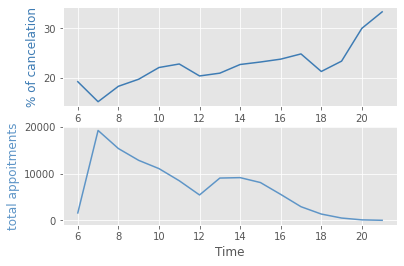

In [11]:
#copy the df and create 2 series, one with the percentage of each hour that there was a "no-show", and the other with the total appointments   

y = df.copy() 
total =  y.groupby(["ScheduledHour"]).count().sort_index()["PatientId"]
y= y.groupby(["ScheduledHour",'No-show']).count().sort_index()
y= y["PatientId"].unstack()
prece= y["Yes"]/(y["No"]+y["Yes"])*100

#setting of the chart
fig, ax = plt.subplots(2,1)
ax[0].plot(prece,color="#3E7CB4")
ax[0].set_xlabel('Time')
ax[0].set_ylabel('% of cancelation', color='#3E7CB4')
ax[1].plot(total,color='#5E95C7')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('total appoitments', color='#5E95C7')
plt.show()


It can be seen that morning appointment are less likely to be canceled. In general, the average cancellation of appointments per day is 22.55. Between the hours of 7-8 am, only 15.5 percent of the appointments were canceled, while as the day progressed, more and more appointments were canceled, and as of 15:00, 30 percent of the appointments were canceled.

Another point concerns the number of appointments scheduled in the evening: the average number of appointments per hour is 6907 but as of 17:00-2909, 18:00-1349, 19:00-488, 20:00-100, 21:00-3 were scheduled.

A suggestion - I advise increasing the staffing of medical staff in the mornings and adding more options for appointments during morning hours, in addition to reducing the staff significantly from 18:00 onwards.

**People with disabilities**

Our next question will check if there exists a difference in show/"no-show" concerning people with disabilities. We'll start with a minor check of the % of "no-show" among people with disabilities. 

In [12]:
#precentage of handicap people that are a "no-show"
y=df[df["Handcap"]>0]
y_no = y[y["No-show"]=="Yes"].count()["PatientId"]
round(y_no/len(y),2)

0.18

It can be seen that there is almost no change from the general population (0.202), so we chose not to go deeper into this issue.

**Age**

Our next question will check if we can find a certain age group of people who do not show up to their appointments.

Mean Decade no-show 0.19556479062572893

% for all the deceades
Age_decade
0     0.199371
10    0.251796
20    0.246733
30    0.217520
40    0.202688
50    0.174998
60    0.150724
70    0.152005
80    0.157841
90    0.201970
dtype: float64

amount appointments for all the decades
Age_decade
0     17475
10    12947
20    13699
30    15171
40    14209
50    15863
60    11876
70     5934
80     2946
90      406
Name: PatientId, dtype: int64


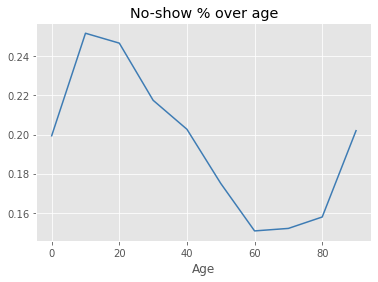

In [13]:
#function to create the decade column
def age_dec(x):
    if len(str(x))==1:
        return 0
    return int(str(x)[0]+str(0))


#add another column with the decade of the patient
df["Age_decade"] = df["Age"].apply(age_dec)

#create pivot table in order to find the number of no-show in each decade
y= df.groupby(["Age_decade","No-show"]).count()
y=y.unstack()["PatientId"]

#create a series for the chart
precenet =y["Yes"]/(y["Yes"]+y["No"])

#set the chart
precenet.plot(kind="line",
              title="No-show % over age",
              color="#3E7CB4",
             xlabel= "Age")

#print data for the review 
print("Mean Decade no-show" ,precenet.mean())
print()
print("% for all the deceades")
print(precenet)

print()
print("amount appointments for all the decades")
amount_dec = df.groupby("Age_decade")["PatientId"].count()
print(amount_dec)

The average non-arrival per decade is (19.5). In this report, we are interested in groups where the percentage of arrival is particularly low. Surprisingly, the decades in which there are fewer appointments are between 10-20 (25.1), 20-30 (24.6). This finding may be due to relative health at young ages and perhaps related to the understanding of responsibility. In addition, at these ages there is a great sum of appointments, therefore the cancellation is critical, and we will accept that this is an issue that needs to be focused on.

**The effect of a reminder message**

Our next question will check the effect of reminder messages as a tool for minimizing "no-show" patients.

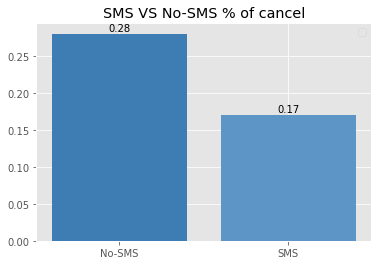

In [14]:
#create different df for those who got an sms and those who didn't  
got_sms = df[df["SMS_received"]==1]
no_sms =  df[df["SMS_received"]==0]

#check at each df what the % of those who no-show
prec_cancel_sms= got_sms[got_sms["No-show"]=="Yes"]["PatientId"].count()/got_sms["PatientId"].count()
prec_cancel_nsms= no_sms[no_sms["No-show"]=="Yes"]["PatientId"].count()/no_sms["PatientId"].count()

#arrange the general settings and data for the chart
x1=[1,2]
y1= [round(prec_cancel_sms,2),round(prec_cancel_nsms,2)]
label = ["No-SMS","SMS"]

#setting of the chart
fig, ax = plt.subplots()
plt.style.use("ggplot")
dat = ax.bar(x1,y1,color = ["#3E7CB4","#5E95C7"])
ax.bar_label(dat,padding=1)
ax.set_title('SMS VS No-SMS % of cancel')
ax.set_xticks(x1, label)
ax.legend()
plt.show()


We can see that there is a marked change between those who received a message and those who did not receive a message.

**Duration between the registration to the actual appointment**

The last question concerns the percentage of arrival depending on the time between the setting of the appointment and the appointment itself.

In [15]:
#create new df that checks the duration between making an appointment to the appointment itself
y= df.groupby(["between_reg2app","No-show"]).count()["PatientId"].unstack()
y["total"] =  y["Yes"] + y["No"]
y.head()

No-show,No,Yes,total
between_reg2app,,,
-6 days,NaN,1.0,NaN
-1 days,NaN,4.0,NaN
0 days,36770.0,1792.0,38562.0
1 days,4100.0,1113.0,5213.0
2 days,5123.0,1602.0,6725.0


We can see that the first two rows are defected, so we will remove them.
In addtion I will remove from the chart rows with less then 1K total appointments.

In [16]:
#remove first 2 rows and calculate just rows with more then 1K in total
y=y.iloc[2:,:]
y1=y[y["total"]>1000]
y1.head(30)

#we can see that until the 22nd day there is consistency with appointments above 1K. 
#we will remove the days from the 22nd day and onwards. 
y1=y.iloc[:23,:]

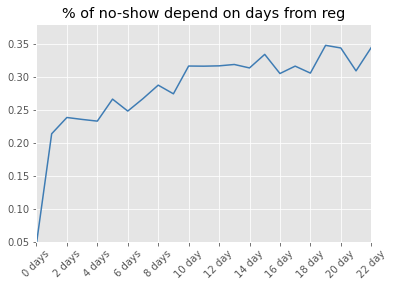

In [17]:
#calcualte the % of no-show and create series depending on the time from reg
precent =  y1["Yes"]/y1["total"]

#arange general settings and the data for the chart
x = np.arange(len(precent))
x_label = [str(item)[:6] for item in precent.index ]
x_label =[x_label[i] for i in range(len(x_label)) if i%2==0] 
ind = np.arange(0,len(x),2)

#setting of the chart
fig, ax = plt.subplots()
ax.plot(x,precent ,color="#3E7CB4")
ax.set_xticks(ind,x_label,rotation= 45)
ax.set_xlim((-0,22))   # set the xlim to left, right
ax.set_ylim((0.05,0.38))   # set the xlim to left, right
ax.set_title("% of no-show depend on days from reg")
plt.show()

We can see that there is an increase that depends on the time between registration to "no-show". After 10 days we can see by the data the percentage goes up to 30 percent, while 7 days before it is just  0.266816.
we can maybe suggest after this discovery to decrease the number of no-shows if we'll call to the patients and "make the appointment again" 6-7 days before the real one. 
in further to the other insights, we'll suggest calling the population with has more probability to no show for the appointment (between 10-30, those who set an appointment to 18:00 and afterwards )

**Conclusions**

The report reviewed the characteristics of those who did not make it to their appointed medical meetings. We found that there is no significant difference between sexes or with disabled people regarding making it to the appointments. An interesting finding is that women make appointments considerably more than men (0.65).

An attempt was also made to understand whether there is a difference concerning the days in the percentage of non-arrival, but the percentages seem to be similar and the differences are negligible, but it was found that there are days when fewer appointments.

Two additional points that require consideration say that as the day progresses the chance of an appointment to happen is lower, and also the chance of not getting to it increases. In addition, there are interesting findings regards to age in terms of non-arrival. 

The last point regarded the importance and impact of a reminder message.

**Suggestions**

* Transfer the majority of the appointments from the evening to the morning.
* Implement reminder messages for all patients.
* Apply a confirmation phone call as a sort of 're-making the appointment' 7 days before the appointment in order to reduce the chances of not arriving.  I suggest focusing the first calls on the population with the higher probability to be a "no-show" - age group of 10-30 and appointment set after 18:00.


**Further research**

* Follow-up on the evening hours and specific days in which people make fewer appointments. Check the data according to each clinic, and consider closing clinics if there are few appointments in the evening/on certain days.